In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X, y = load_iris(return_X_y = True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(array([1, 2, 3, 4]),
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

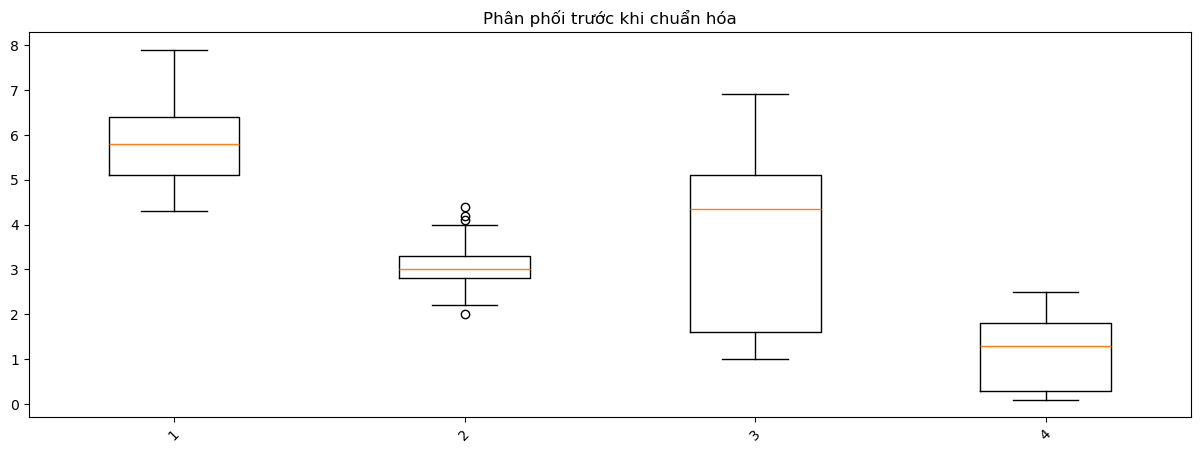

In [25]:
plt.figure(figsize=(15, 5))
# Trước khi chuẩn hóa
plt.boxplot(X)
plt.title('Phân phối trước khi chuẩn hóa')
plt.xticks(rotation=45)

(array([1, 2, 3, 4]),
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

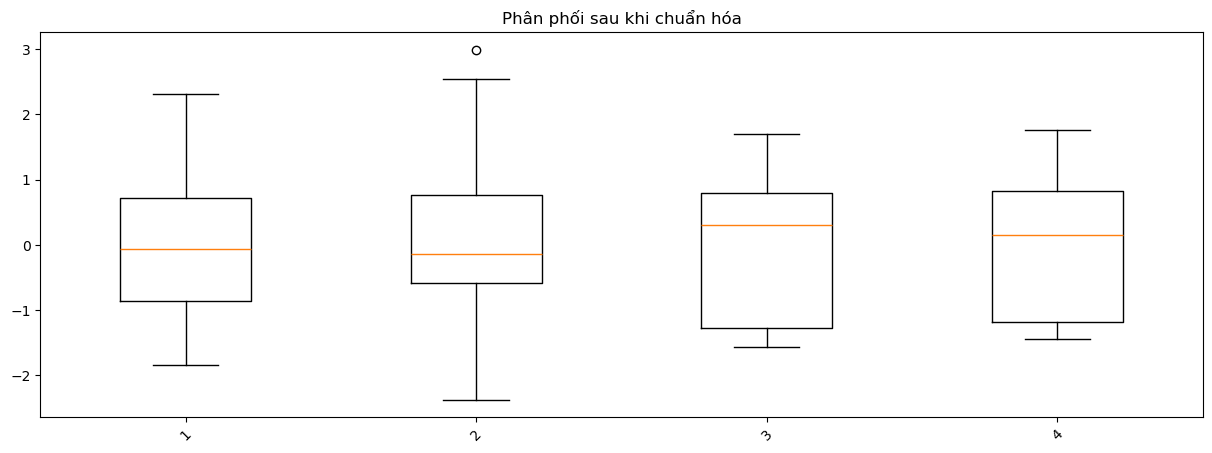

In [26]:
plt.figure(figsize=(15, 5))
# Trước khi chuẩn hóa
plt.boxplot(X_train)
plt.title('Phân phối sau khi chuẩn hóa')
plt.xticks(rotation=45)

In [27]:
# Dự đoán
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Tính các metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [29]:
# In kết quả
print(f"\nKết quả hồi quy đa biến cho {y}")
print("\nHệ số hồi quy:")
for name, coef in zip(X, model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"Hệ số tự do (w0): {model.intercept_:.4f}")

print(f"\nMetrics đánh giá:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2 Score: {train_r2:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")


Kết quả hồi quy đa biến cho [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Hệ số hồi quy:
[5.1 3.5 1.4 0.2]: -0.0954
[4.9 3.  1.4 0.2]: -0.0267
[4.7 3.2 1.3 0.2]: 0.4448
[4.6 3.1 1.5 0.2]: 0.4102
Hệ số tự do (w0): 0.9917

Metrics đánh giá:
Train MSE: 0.0491
Test MSE: 0.0371
Train R2 Score: 0.9254
Test R2 Score: 0.9469


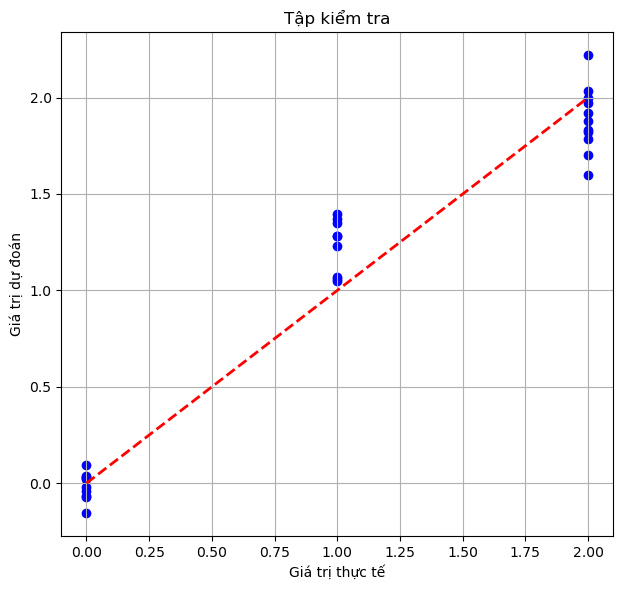

In [32]:
# Tập kiểm tra
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Tập kiểm tra')
plt.grid(True)
plt.tight_layout()
plt.show()